In [1]:
# 모듈가져오기
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# 데이터 가져오기
wine_quality = pd.read_csv('./Data/winequality-red.csv', sep = ';')

In [3]:
# 데이터 확인 - head()
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# 데이터 확인 - tail()
wine_quality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# 데이터 확인 - sample(5)
wine_quality.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1183,6.8,0.66,0.07,1.6,0.070,16.0,61.0,0.99572,3.29,0.60,9.3,5
744,11.1,0.39,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5,5
769,7.9,0.72,0.01,1.9,0.076,7.0,32.0,0.99668,3.39,0.54,9.6,5
1031,7.3,0.55,0.01,1.8,0.093,9.0,15.0,0.99514,3.35,0.58,11.0,7
723,7.1,0.31,0.30,2.2,0.053,36.0,127.0,0.99650,2.94,1.62,9.5,5


In [6]:
# 데이터 컬럼 확인
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# 컬럼의 공백을 '_'로 수정
wine_quality.rename(columns = lambda x: x.replace(' ', '_'), inplace = True)

In [8]:
# 컬럼 이름 변경 확인
wine_quality.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
# 산포도를 그리는데 필요한 컬럼 정의
# 확인해보고 싶은 컬럼 어떤거여도 상관 없다 -> 바꿔서 나중에 다시 한 번 테스트 해보기
eda_colnms = ['volatile_acidity', 'chlorides', 'sulphates', 'alcohol', 'quality']

In [10]:
# 산포도 - 쌍
sns.set(style = 'whitegrid', context = 'notebook')

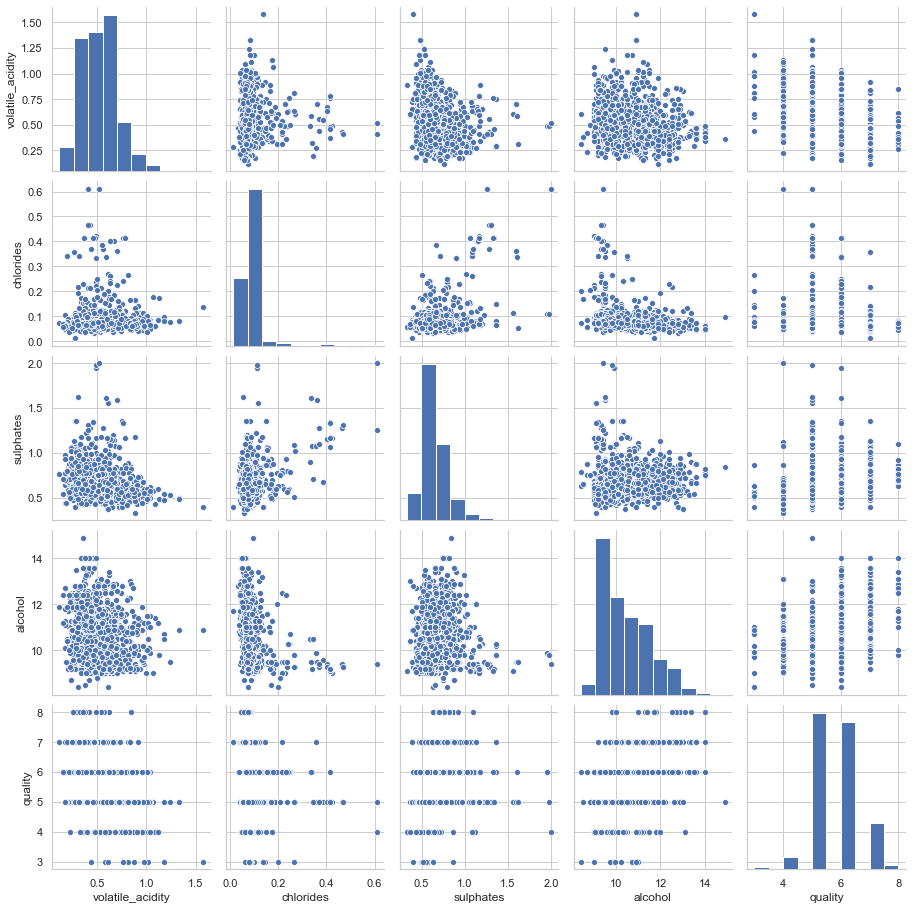

In [11]:
sns.pairplot(wine_quality[eda_colnms], height = 2.5, x_vars = eda_colnms, y_vars = eda_colnms )

In [12]:
# 초기에 변수가 많을 경우 상관계수를 이용해서 탈락시킬 변수들을 선택적 제거
# 상관계수
corr_mat = np.corrcoef(wine_quality[eda_colnms].values.T)

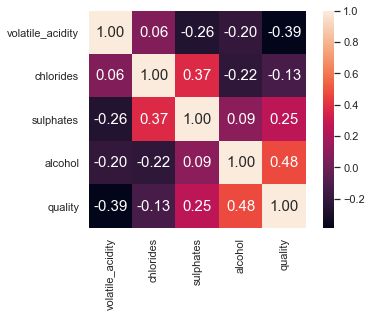

In [13]:
# heatmap을 이용해서 상관계수 행렬을 표현
sns.set(font_scale = 1)
full_mat = sns.heatmap(corr_mat, cbar=True, annot = True, square=True
                      ,fmt = '.2f', annot_kws = {'size' : 15}, yticklabels = eda_colnms, xticklabels = eda_colnms)

In [14]:
# 후진 제거법
# 컬럼 이름 재확인
wine_quality.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
# 컬럼 변수 지정
colnms = wine_quality.columns[:-1]

In [16]:
# 컬럼 확인
print(colnms)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [17]:
pdx = wine_quality[colnms]
pdy = wine_quality['quality']

In [18]:
# train, test 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, train_size = 0.7, random_state = 42)

In [19]:
# add_constant 절편 변수 생성 ????
x_train_new = sm.add_constant(x_train) # => 단순히 값이 1.0인 실수형의 데이터와 const 컬럼을 생성시키는것
x_test_new = sm.add_constant(x_test)

In [20]:
full_mod = sm.OLS(y_train, x_train_new) # Ordinary Least Square

In [21]:
# 더빈왓슨 검정 값 무엇인지 확인해야 한다
full_res = full_mod.fit()
full_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     56.90
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          8.34e-100
Time:                        19:47:39   Log-Likelihood:                -1103.5
No. Observations:                1119   AIC:                             2231.
Df Residuals:                    1107   BIC:                             2291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.9626     25.237      0.712      0.477     -31.555      67.480
fixed_acidity            0.0235      0.031      0.769      0.442      -0.036       0.083
volatile_acidity        -1.0996      0.145     -7.599      0.000      -1.384      -0.816
citric_acid             -0.2479      0.177     -1.402      0.161      -0.595       0.099
residual_sugar           0.0077      0.018      0.429      0.668      -0.028       0.043
chlorides               -1.6736      0.500     -3.344      0.001      -2.656      -0.692
free_sulfur_dioxide      0.0046      0.003      1.706      0.088      -0.001       0.010
total_sulfur_dioxide    -0.0033      0.001     -3.723      0.000      -0.005      -0.002
density                -14.2396     25.750     -0.553      0.580     -64.763      36.284
pH                      -0.3192      0.227     -1.404      0.161      -0.766       0.127
sulphates                0.8128      0.135      6.007      0.000       0.547       1.078
alcohol                  0.2920      0.032      9.268      0.000       0.230       0.354
==============================================================================
Omnibus:                       29.060   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.192
Skew:                          -0.193   Prob(JB):                     1.26e-11
Kurtosis:                       3.963   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# 개별 변수의 VIF를 계산한다 (Variation Inflation Factor)
cnames = x_train.columns

In [23]:
# 컬럼 변수들끼리 영향을 미치는지 확인하는 작업
for i in range(0,len(cnames)): # => 0 ~ 10까지 숫자 하나씩 뽑아오기
    xvars = list(cnames) # cnames 데이텨 list로 변환
    yvar = xvars.pop(i)  # cnames에서 변수 하나씩 빼오기
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars])) 
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar,round(vif,3))

fixed_acidity 7.189
volatile_acidity 1.824
citric_acid 3.139
residual_sugar 1.742
chlorides 1.463
free_sulfur_dioxide 1.973
total_sulfur_dioxide 2.205
density 5.902
pH 3.224
sulphates 1.428
alcohol 2.93


In [24]:
# 재출력
full_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     56.90
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          8.34e-100
Time:                        19:47:39   Log-Likelihood:                -1103.5
No. Observations:                1119   AIC:                             2231.
Df Residuals:                    1107   BIC:                             2291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.9626     25.237      0.712      0.477     -31.555      67.480
fixed_acidity            0.0235      0.031      0.769      0.442      -0.036       0.083
volatile_acidity        -1.0996      0.145     -7.599      0.000      -1.384      -0.816
citric_acid             -0.2479      0.177     -1.402      0.161      -0.595       0.099
residual_sugar           0.0077      0.018      0.429      0.668      -0.028       0.043
chlorides               -1.6736      0.500     -3.344      0.001      -2.656      -0.692
free_sulfur_dioxide      0.0046      0.003      1.706      0.088      -0.001       0.010
total_sulfur_dioxide    -0.0033      0.001     -3.723      0.000      -0.005      -0.002
density                -14.2396     25.750     -0.553      0.580     -64.763      36.284
pH                      -0.3192      0.227     -1.404      0.161      -0.766       0.127
sulphates                0.8128      0.135      6.007      0.000       0.547       1.078
alcohol                  0.2920      0.032      9.268      0.000       0.230       0.354
==============================================================================
Omnibus:                       29.060   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.192
Skew:                          -0.193   Prob(JB):                     1.26e-11
Kurtosis:                       3.963   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# AIC : 절대 수치는 중요하지 않다. 상대 수치가 중요하고 적을수록 좋다.
# 수정 R제곱 : 0.7 이상이어야 한다
# 개별 변수의 P값 : 0.05 이하여야 한다
# 개별 변수의 VIF : 5여야 한다

In [26]:
# 결론
# 1. residual_sugar의 P값이 0.668로 가장 높다 => 우선순위가 가장 높다
# 따라서, residual_sugar 변수를 제거한다 => P-value가 가장 큰 값을 제거한다는 논리 적용하면 자동화 할 수 있다.
# 새로운 데이터 프레임 만들기
x_train_new = x_train[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
x_test_new = x_test[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [27]:
# 모델 피팅을 위한 작업
x_train_new2 = sm.add_constant(x_train_new)
x_test_new2 = sm.add_constant(x_test_new)
full_mod = sm.OLS(y_train,x_train_new2)
full_res = full_mod.fit()

In [28]:
# 결과 확인
full_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     62.62
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          1.12e-100
Time:                        19:47:40   Log-Likelihood:                -1103.6
No. Observations:                1119   AIC:                             2229.
Df Residuals:                    1108   BIC:                             2284.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3324     19.948      0.568      0.570     -27.807      50.472
fixed_acidity            0.0175      0.027      0.645      0.519      -0.036       0.071
volatile_acidity        -1.0997      0.145     -7.602      0.000      -1.384      -0.816
citric_acid             -0.2417      0.176     -1.372      0.170      -0.587       0.104
chlorides               -1.6752      0.500     -3.349      0.001      -2.657      -0.694
free_sulfur_dioxide      0.0047      0.003      1.775      0.076      -0.000       0.010
total_sulfur_dioxide    -0.0033      0.001     -3.718      0.000      -0.005      -0.002
density                 -7.4762     20.356     -0.367      0.713     -47.416      32.464
pH                      -0.3524      0.214     -1.648      0.100      -0.772       0.067
sulphates                0.8010      0.132      6.049      0.000       0.541       1.061
alcohol                  0.2988      0.027     11.010      0.000       0.246       0.352
==============================================================================
Omnibus:                       27.765   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.597
Skew:                          -0.185   Prob(JB):                     4.62e-11
Kurtosis:                       3.940   Cond. No.                     8.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# 개별 변수의 VIF를 계산한다 (Variation Inflation Factor)
cnames_new = x_train_new.columns

In [30]:
# 컬럼 변수들끼리 영향을 미치는지 확인하는 작업
for i in range(0,len(cnames_new)): # => 0 ~ 10까지 숫자 하나씩 뽑아오기
    xvars = list(cnames_new) # cnames 데이텨 list로 변환
    yvar = xvars.pop(i)  # cnames에서 변수 하나씩 빼오기
    mod = sm.OLS(x_train_new[yvar], sm.add_constant(x_train_new2[xvars])) 
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar,round(vif,3))

fixed_acidity 5.707
volatile_acidity 1.824
citric_acid 3.118
chlorides 1.463
free_sulfur_dioxide 1.942
total_sulfur_dioxide 2.204
density 3.691
pH 2.852
sulphates 1.368
alcohol 2.176


In [31]:
# 두번째 시행 결론
# density가 p-value 0.713으로 제거 대상
# 새로운 데이터프레임 생성
x_train_new3 = x_train_new[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH',
       'sulphates', 'alcohol']]
x_test_new3 = x_test_new[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH',
       'sulphates', 'alcohol']]

In [32]:
# 모델을 위한 피팅작업
x_train_new4 = sm.add_constant(x_train_new3)
x_test_new4 = sm.add_constant(x_test_new3)
full_mod = sm.OLS(y_train, x_train_new4)
full_res = full_mod.fit()

In [33]:
# 결과 확인
full_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     69.62
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          1.40e-101
Time:                        19:47:40   Log-Likelihood:                -1103.6
No. Observations:                1119   AIC:                             2227.
Df Residuals:                    1109   BIC:                             2277.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.0110      0.732      5.479      0.000       2.575       5.447
fixed_acidity            0.0105      0.019      0.545      0.586      -0.027       0.048
volatile_acidity        -1.1072      0.143     -7.733      0.000      -1.388      -0.826
citric_acid             -0.2470      0.175     -1.408      0.159      -0.591       0.097
chlorides               -1.6903      0.498     -3.392      0.001      -2.668      -0.713
free_sulfur_dioxide      0.0047      0.003      1.785      0.074      -0.000       0.010
total_sulfur_dioxide    -0.0033      0.001     -3.774      0.000      -0.005      -0.002
pH                      -0.3902      0.187     -2.082      0.038      -0.758      -0.022
sulphates                0.7926      0.130      6.079      0.000       0.537       1.048
alcohol                  0.3052      0.021     14.630      0.000       0.264       0.346
==============================================================================
Omnibus:                       27.594   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.213
Skew:                          -0.184   Prob(JB):                     5.60e-11
Kurtosis:                       3.937   Cond. No.                     2.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# VIF 값 게산
cnames_new2 = x_train_new3.columns

In [45]:
for i in range(0, len(cnames_new2)):
    xvars = list(cnames_new2)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train_new3[yvar], sm.add_constant(x_train_new4[xvars]))
    res = mod.fit()
    vif = 1/(1 - res.rsquared)
    print(yvar, round(vif, 3))

fixed_acidity 2.858
volatile_acidity 1.788
citric_acid 3.097
chlorides 1.453
free_sulfur_dioxide 1.94
total_sulfur_dioxide 2.183
pH 2.192
sulphates 1.328
alcohol 1.287


In [36]:
# 결론
# fixed_aciditydl P-value가 0.5이상이라서 제거 대상
x_train_new5 = x_train_new3[['volatile_acidity', 'citric_acid', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH' ,'sulphates',
       'alcohol']]
x_test_new5 = x_test_new3[['volatile_acidity', 'citric_acid', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH','sulphates',
       'alcohol']]

In [37]:
# 모델 피팅 작업
x_train_new6 = sm.add_constant(x_train_new5)
x_test_new6 = sm.add_constant(x_test_new5)
full_mod = sm.OLS(y_train, x_train_new6)
full_res = full_mod.fit()

In [38]:
# 결과 확인
full_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     78.33
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          1.77e-102
Time:                        19:47:40   Log-Likelihood:                -1103.8
No. Observations:                1119   AIC:                             2226.
Df Residuals:                    1110   BIC:                             2271.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.2723      0.553      7.727      0.000       3.187       5.357
volatile_acidity        -1.0877      0.139     -7.847      0.000      -1.360      -0.816
citric_acid             -0.1945      0.147     -1.327      0.185      -0.482       0.093
chlorides               -1.7561      0.483     -3.633      0.000      -2.705      -0.808
free_sulfur_dioxide      0.0048      0.003      1.834      0.067      -0.000       0.010
total_sulfur_dioxide    -0.0034      0.001     -4.067      0.000      -0.005      -0.002
pH                      -0.4444      0.159     -2.800      0.005      -0.756      -0.133
sulphates                0.7954      0.130      6.107      0.000       0.540       1.051
alcohol                  0.3042      0.021     14.647      0.000       0.263       0.345
==============================================================================
Omnibus:                       26.793   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.404
Skew:                          -0.181   Prob(JB):                     1.38e-10
Kurtosis:                       3.918   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# VIF 계산
cnames_new3 = x_train_new5.columns
for i in range(0,len(cnames_new3)):
    xvars = list(cnames_new3)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train_new5[yvar], sm.add_constant(x_train_new6[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif, 3))

volatile_acidity 1.677
citric_acid 2.161
chlorides 1.368
free_sulfur_dioxide 1.929
total_sulfur_dioxide 2.028
pH 1.573
sulphates 1.325
alcohol 1.276


In [40]:
# 결론
# citric_acid가 P-value > 0.5 이므로 제거대상
x_train_new7 = x_train_new5[['volatile_acidity', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']]
x_test_new7 = x_test_new5[['volatile_acidity', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates','alcohol']]

In [41]:
# 모델 피팅 작업
x_train_new8 = sm.add_constant(x_train_new7)
x_test_new8 = sm.add_constant(x_test_new7)
full_mod = sm.OLS(y_train, x_train_new8)
full_res = full_mod.fit()

In [42]:
# 결과 확인
full_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.21
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          4.31e-103
Time:                        19:47:40   Log-Likelihood:                -1104.7
No. Observations:                1119   AIC:                             2225.
Df Residuals:                    1111   BIC:                             2266.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9210      0.486      8.074      0.000       2.968       4.874
volatile_acidity        -0.9941      0.119     -8.327      0.000      -1.228      -0.760
chlorides               -1.8800      0.474     -3.963      0.000      -2.811      -0.949
free_sulfur_dioxide      0.0054      0.003      2.075      0.038       0.000       0.010
total_sulfur_dioxide    -0.0036      0.001     -4.395      0.000      -0.005      -0.002
pH                      -0.3469      0.141     -2.465      0.014      -0.623      -0.071
sulphates                0.7872      0.130      6.049      0.000       0.532       1.043
alcohol                  0.2987      0.020     14.672      0.000       0.259       0.339
==============================================================================
Omnibus:                       27.862   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.326
Skew:                          -0.189   Prob(JB):                     5.29e-11
Kurtosis:                       3.934   Cond. No.                     1.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# VIF 계산
cnames_new4 = x_train_new7.columns
for i in range(0,len(cnames_new4)):
    xvars = list(cnames_new4)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train_new7[yvar], sm.add_constant(x_train_new8[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif, 3))

volatile_acidity 1.243
chlorides 1.317
free_sulfur_dioxide 1.878
total_sulfur_dioxide 1.956
pH 1.236
sulphates 1.322
alcohol 1.225


In [69]:
# 데이터 예측
y_pred = full_res.predict(x_test_new8)
y_pred_df = y_pred.to_frame()

In [70]:
# 컬럼명 수정
y_pred_df.columns = ['y_pred']

In [75]:
# 데이터 프레임 작업
pred_data = y_pred_df
pred_data[['y_pred', 'y_test']] = pd.concat([y_pred, y_test.to_frame()], axis = 1)


In [76]:
# 결과 확인
pred_data

,y_pred,y_test
803,5.321568,6
124,5.052455,5
350,5.612707,6
682,5.476307,5
1326,5.755050,6
...,...,...
1468,5.652350,7
495,6.114797,8
1325,5.755050,6
514,6.162830,7


In [78]:
# R-제곱 계산
rsqd = r2_score(pred_data['y_test'], pred_data['y_pred'])
print(round(rsqd,4))

0.3519


In [ ]:
# 최종결론
# 선형 회귀 결과에 따르면 독립 변수와 종속 변수 간에는 어떠한 관계도 형성되지 않는다는 결론